<IPython.core.display.Javascript object>


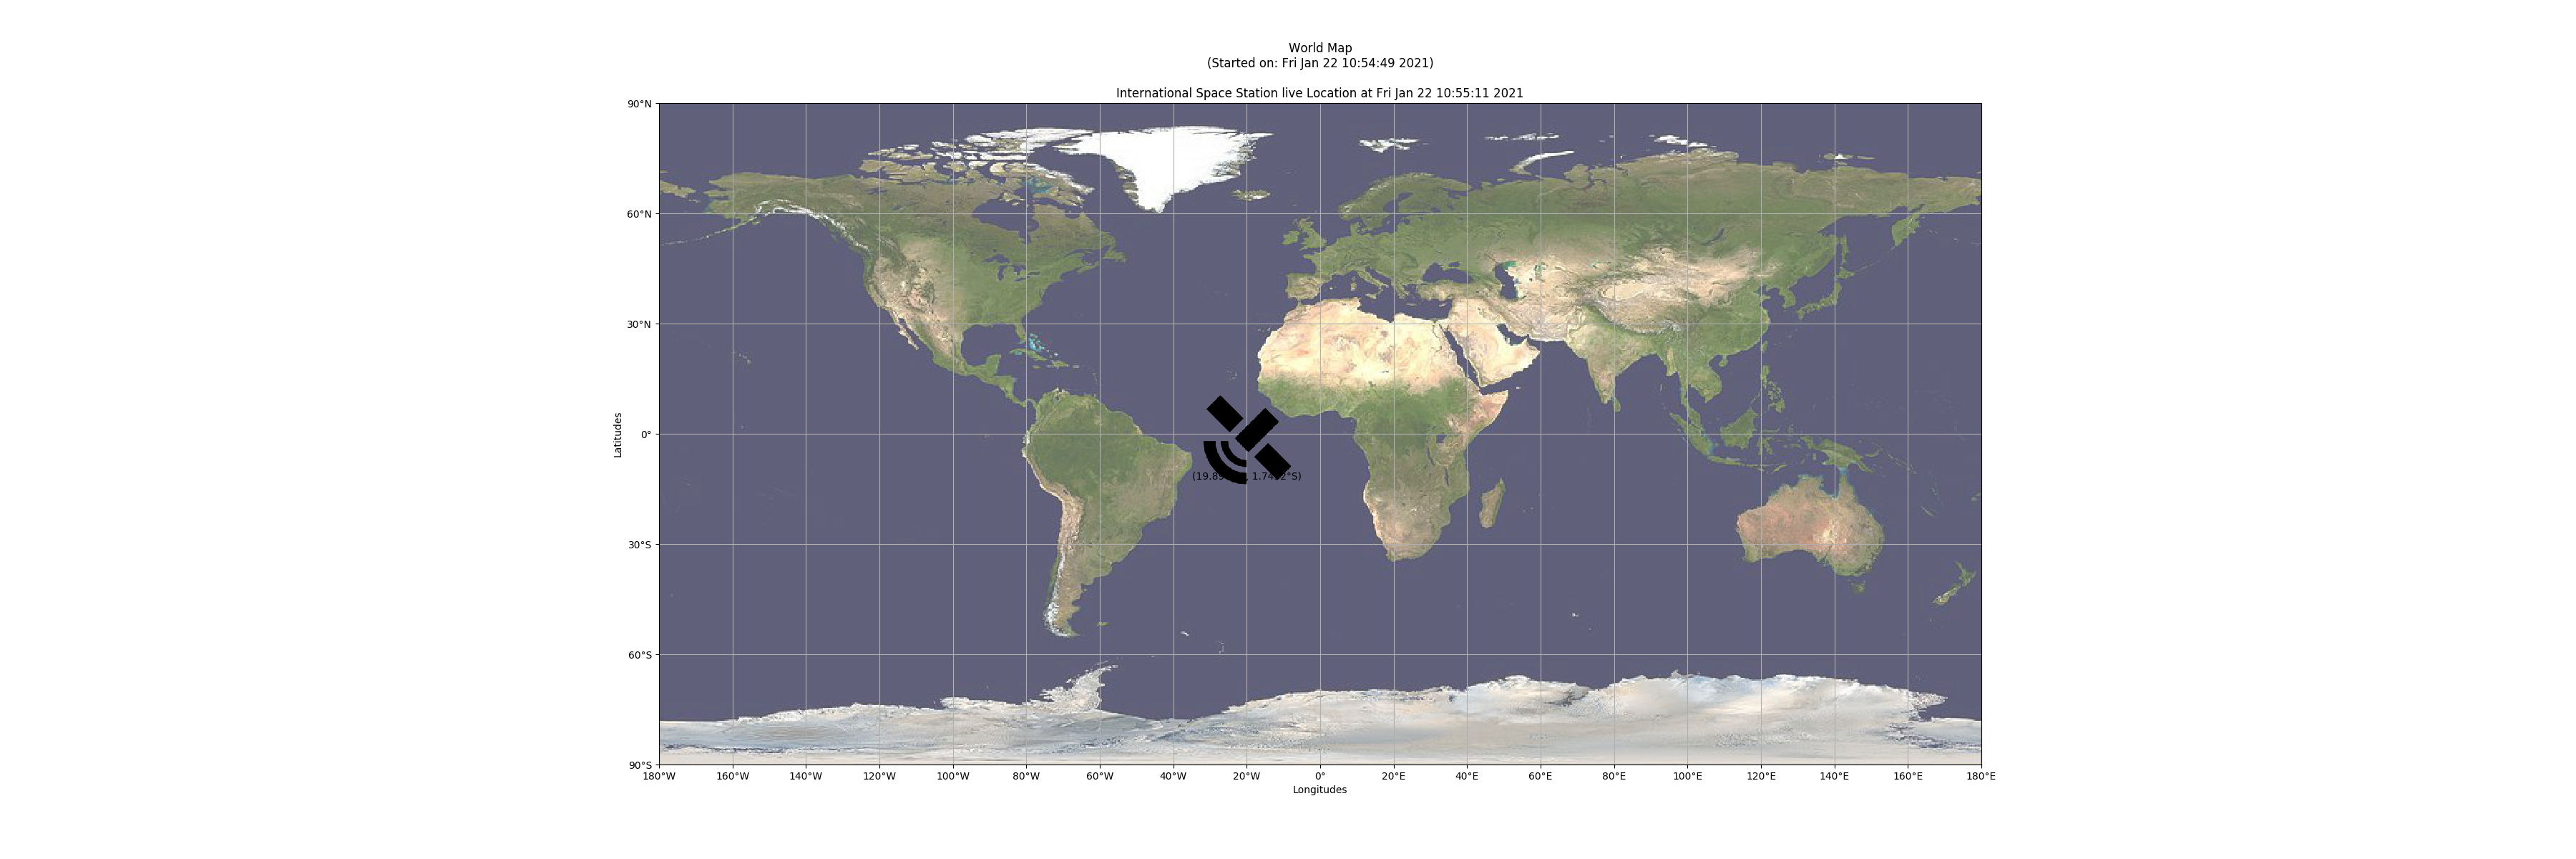

Timestamp: Fri Jan 22 10:54:49 2021	Latitude: -2.8612	Longitude: -20.6893
Timestamp: Fri Jan 22 10:54:54 2021	Latitude: -2.5822	Longitude: -20.4911
Timestamp: Fri Jan 22 10:55:00 2021	Latitude: -2.3033	Longitude: -20.293
Timestamp: Fri Jan 22 10:55:05 2021	Latitude: -2.0242	Longitude: -20.0949
Timestamp: Fri Jan 22 10:55:11 2021	Latitude: -1.7452	Longitude: -19.897
Timestamp: Fri Jan 22 10:55:16 2021	Latitude: -1.4916	Longitude: -19.7172


KeyboardInterrupt: 

In [3]:
%matplotlib notebook
# for matplotlib stuffs
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea

# for iss api
import urllib.request
import json
import time

# for os
import sys, os



# setting map image
# map_image = 'assets\\1024px-Land_shallow_topo_2048.jpg'
map_image = os.path.join('assets', '1024px-Land_shallow_topo_2048.jpg')
map_ = plt.imread(map_image)

# setting iss icon image
# iss_image = 'assets\\iss.png'
iss_image = os.path.join('assets', 'iss.png')
iss_ = plt.imread(iss_image)

# initialising past locations history
past_loc = []


# minimum and maximum longitude and latitude
min_longi = -180
max_longi = 180
min_lati = -90
max_lati = 90

# setting extent box
BBox = ((min_longi, max_longi,  
         min_lati, max_lati))



# scale factor
sf = 10

# setting width and height of the map image
width = abs(max_longi - min_longi) / sf
height = abs(max_lati - min_lati) / (sf+5)

# zoom factor of the iss icon
z = 0.5


def get_iss_loc():
    # iss api information

    url = 'http://api.open-notify.org/iss-now.json'

    # sending api request and returning result
    response = urllib.request.urlopen(url)
    result = json.loads(response.read())

    # gathered iss location
    location = result['iss_position']
    latitude = location['latitude']
    longitude = location['longitude']
    timestamp = result['timestamp']

    # marking point with request timestamp
    return ((float(longitude), float(latitude)), timestamp)




# empty plot
fig, ax = plt.subplots(figsize=(width, height))

# customizing plot
ax.set_xlim(min_longi, max_longi)
ax.set_ylim(min_lati , max_lati)
ax.set_xlabel('Longitudes')
ax.set_ylabel('Latitudes')
ax.grid(True)

# longitude and latitude ticks list
longi_li = list(range(min_longi, max_longi+1, 20))
lati_li = list(range(min_lati, max_lati+1, 30))

def append_deg(x, neg, pos):
    if x < 0:
        return str(abs(x)) + u"\u00b0" + neg
    elif x > 0:
        return str(x) + u"\u00b0" + pos
    else:
        return str(x) + u"\u00b0"

longi_li = list(map(lambda x: append_deg(x, 'W', 'E'), longi_li))
lati_li = list(map(lambda x: append_deg(x, 'S', 'N'), lati_li))

# setting axes ticks
plt.xticks(ticks=list(range(min_longi, max_longi+1, 20)), labels=longi_li)
plt.yticks(ticks=list(range(min_lati, max_lati+1, 30)), labels=lati_li)

# display map with 65% transperancy
ax.imshow(map_, alpha=0.65, extent = BBox)

# iss icon
im = OffsetImage(iss_, zoom=z)
fig_num = fig.number

start_time = None
while True:
    try:
        pt, t = get_iss_loc()   #   use API to get iss location and timestamp
    except Exception as e:
        print('An Exception was raised while requesting through API. Details are as follows:')
        print(e)
        input('Press any key to quit...')
        sys.exit()


    if start_time is None:  #   ensure single time usage
        start_time = t

    past_loc.append(pt) # saving to past location

    # printing information in console
    print(f'Timestamp: {time.ctime(t)}\tLatitude: {pt[1]}\tLongitude: {pt[0]}')

    # setting title of the plot (dynamic timing)
    ax.set_title('World Map\n'+'(Started on: '+time.ctime(start_time)+')\n\nInternational Space Station live Location at '+time.ctime(t))

    # annonating iss icon
    ab = AnnotationBbox(im, pt, xycoords='data', frameon=False)
    ax.add_artist(ab)

    # annonating lngitude and latitude
    tx = TextArea(f"({append_deg(pt[0], 'W', 'E')}, {append_deg(pt[1], 'S', 'N')})")
    ab2 = AnnotationBbox(tx, (pt[0], pt[1]-10), xycoords='data', frameon=False)
    ax.add_artist(ab2)

    # plotting past point
    plt.scatter(past_loc[-1][0], past_loc[-1][1], c='r', s=3, alpha=0.9)

    plt.pause(5)
    fig.show()
    fig.canvas.draw()

    if not plt.fignum_exists(fig_num):
        if not os.path.exists('saved_runs'):
            os.mkdir('saved_runs')
        #loc = os.path.join('saved_runs', f'run{start_time}')
        loc = os.path.join('saved_runs', f'run{t}')
        print(f'Saving plot as: {loc}')
        fig.savefig(loc)
        sys.exit()

    ab.remove() # remove previous iss icon
    ab2.remove() # remove previous latitude, longitude annonate
